In [1]:
import pickle
import pandas as pd
import dtale
import datetime
import matplotlib.pyplot as plt
import tabloo
import numpy as np

In [2]:
%matplotlib widget

In [ ]:
def bondPriceToYield(bondRow):
    timeLeft = bondRow['maturity'] - bondRow['date']
    interestRate = bondRow['coupon']
    yearsLeft = timeLeft.days/365.
    interest = yearsLeft * interestRate
    totalYield = (100 - bondRow['end-of-day-price'] + interest)/yearsLeft
    return totalYield

In [52]:
treasuriesPicklePath = '/Users/jetti/data/bonds/treasuries.pkl'

with open(treasuriesPicklePath, 'rb') as f:
  data = pickle.load(f)

df = pd.DataFrame(data)
df.columns = ['date','cusip','description','coupon','maturity','call','buy','sell','end-of-day-price']
df = df.drop(['call','buy','sell'], axis=1)
df['end-of-day-price'] = df['end-of-day-price'].astype('float')
df['coupon'] = [float(i[0:-1]) for i in df['coupon']]
df['maturity'] = [datetime.datetime.strptime(i,'%m/%d/%Y') for i in df['maturity']]

'''
# create dictionary mapping cusip to term length
termDict = {}

earliestDate = df['date'].min()
for thisCusip in set(df['cusip']):
    dfCusip = df[df['cusip'] == thisCusip]
    minDate = dfCusip['date'].min()
    if minDate > earliestDate:
        maturity = dfCusip['maturity'].iloc[0]
        termLength = ((maturity - minDate).days)/7
        termDict[thisCusip] = termLength
    else:
        termDict[thisCusip] = 0
'''

print(len(df))

1162368


In [ ]:
dtale.show(df)

In [ ]:
year = 2023
month = 9
day = 12

cusipList = list(set(df[df['maturity'] == datetime.datetime(year=year, month=month, day=day)]['cusip']))
cusipList

In [18]:
#cusip = cusipList[0]
cusip = '9128285D8'

thisTreasury = df[df['cusip'] == cusip].sort_values('date')
#dtale.show(thisTreasury)

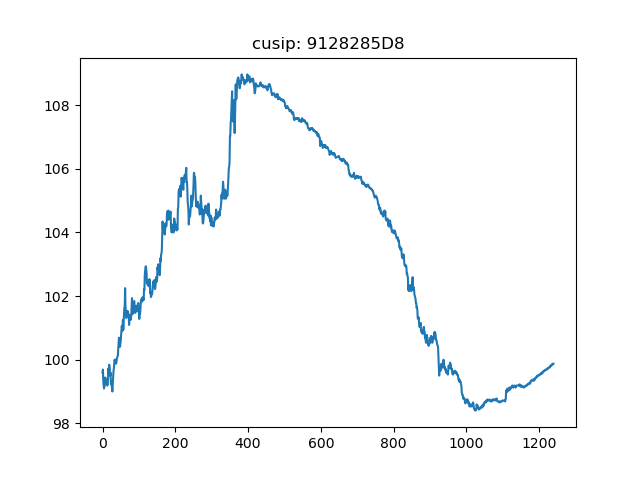

In [20]:
plt.figure()
plt.plot(thisTreasury['end-of-day-price'].to_numpy())
plt.title("cusip: " + cusip)
plt.show()

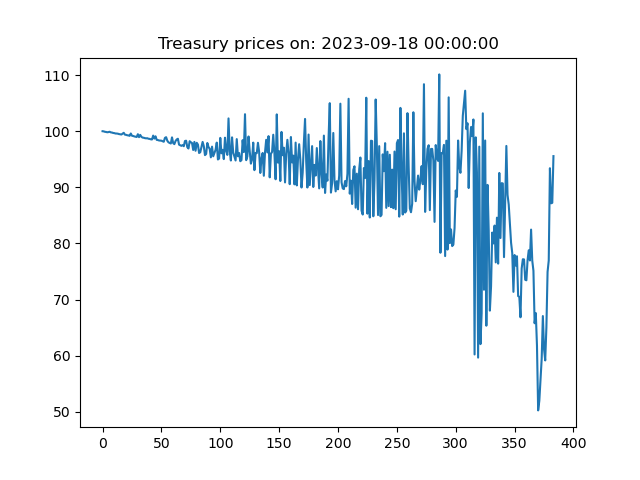

In [54]:
year = 2023
month = 9
day = 18

thisDate = datetime.datetime(year=year, month=month, day=day)
thisDayAll = df[(df['date'] == thisDate) & (df['description'] != 'TIPS') &  (df['description'] != 'MARKET BASED FRN')].sort_values('maturity')

plt.figure()
plt.plot(thisDayAll['end-of-day-price'].to_numpy())
plt.title("Treasury prices on: " + str(thisDate))
plt.show()

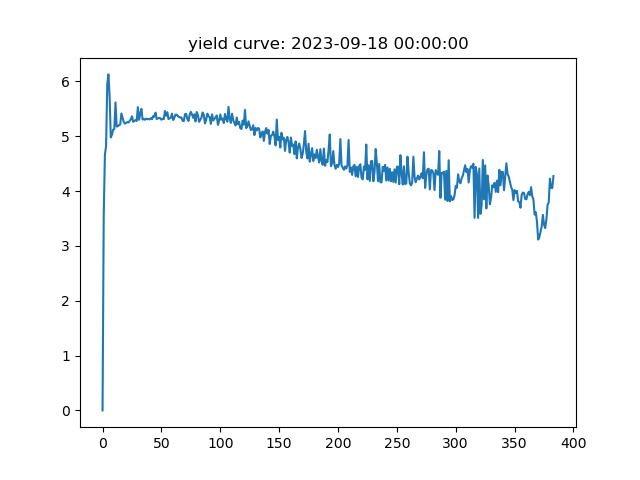

In [57]:
allYields = [bondPriceToYield(thisDayAll.iloc[i]) for i in range(0,len(thisDayAll))]
thisDayAll['yield'] = allYields
plt.figure()
plt.plot(allYields)
plt.title("yield curve: " + str(thisDate))
plt.show()